### Importaçãode bibliotecas

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

### Carregamento de dataset e pré-processamento

In [12]:
data = pd.read_csv("wine_quality.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      6497 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [13]:
#attributes = data.iloc[:, 0:11].values
#quality = data.iloc[:, 11].values
attributes = data[["fixed.acidity","volatile.acidity","citric.acid","residual.sugar","chlorides","free.sulfur.dioxide","total.sulfur.dioxide","density","pH","sulphates","alcohol"]]
quality = data[["quality"]]

In [14]:
quality["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [21]:
# definição de classes e features
class_a = 5
class_b = 6
feature_0 = "alcohol"
feature_1 = "free.sulfur.dioxide"
feature_2 = "volatile.acidity"
feature_3 = "sulphates"
feature_4 = "density"

# filtrar classes e features
class_0_instances = (quality.values == class_a)
class_1_instances = (quality.values == class_b)

filtered_y = quality[class_0_instances | class_1_instances]
filtered_X = attributes[class_0_instances | class_1_instances]
# filtered_X = attributes
# filtered_X = filtered_X[[feature_0, feature_1,feature_2,feature_3,feature_4]]

In [22]:
#X_train, X_test, y_train, y_test = train_test_split(filtered_X, filtered_y, test_size=0.1, random_state=199)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=199)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(attributes, quality, test_size=0.1, random_state=199)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=199)

In [28]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

[[  0   0   0   0   1   0   0]
 [  0   5   7   7   0   0   0]
 [  1   7 135  66   8   2   0]
 [  0   7  57 166  38   7   0]
 [  0   0   5  27  75   6   0]
 [  0   0   2   7   6   6   0]
 [  0   0   0   1   0   1   0]]


C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


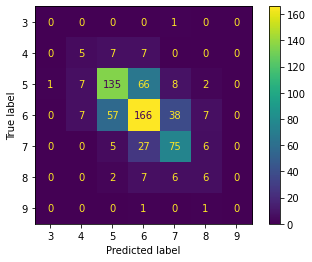

In [32]:
predicted_y = model.predict(X_test)
print(confusion_matrix(y_test, predicted_y)) #labels define como será a ordem das classes na matriz
plot_confusion_matrix(model, X_test, y_test)

In [33]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.26      0.26      0.26        19
           5       0.66      0.62      0.64       219
           6       0.61      0.60      0.60       275
           7       0.59      0.66      0.62       113
           8       0.27      0.29      0.28        21
           9       0.00      0.00      0.00         2

    accuracy                           0.60       650
   macro avg       0.34      0.35      0.34       650
weighted avg       0.60      0.60      0.59       650



C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.47308089227201006, 0.9807692307692307, 'X[10] <= 10.117\ngini = 0.672\nsamples = 5262\nvalue = [25, 179, 1718, 2304, 876, 157, 3]'),
 Text(0.21220002173938082, 0.9423076923076923, 'X[1] <= 0.287\ngini = 0.59\nsamples = 2428\nvalue = [13, 96, 1230, 936, 133, 20, 0]'),
 Text(0.10159021411130563, 0.9038461538461539, 'X[1] <= 0.237\ngini = 0.611\nsamples = 1095\nvalue = [5, 23, 388, 550, 111, 18, 0]'),
 Text(0.045234468580116094, 0.8653846153846154, 'X[0] <= 6.85\ngini = 0.609\nsamples = 592\nvalue = [3, 11, 151, 327, 83, 17, 0]'),
 Text(0.028586565926471942, 0.8269230769230769, 'X[8] <= 3.245\ngini = 0.506\nsamples = 273\nvalue = [1, 3, 74, 176, 19, 0, 0]'),
 Text(0.018289873767621857, 0.7884615384615384, 'X[3] <= 15.5\ngini = 0.423\nsamples = 162\nvalue = [1, 2, 34, 118, 7, 0, 0]'),
 Text(0.017552750391596792, 0.75, 'X[2] <= 0.455\ngini = 0.488\nsamples = 131\nvalue = [1, 2, 34, 87, 7, 0, 0]'),
 Text(0.008384778402285083, 0.7115384615384616, 'X[2] <= 0.245\ngini = 0.432\nsamples 

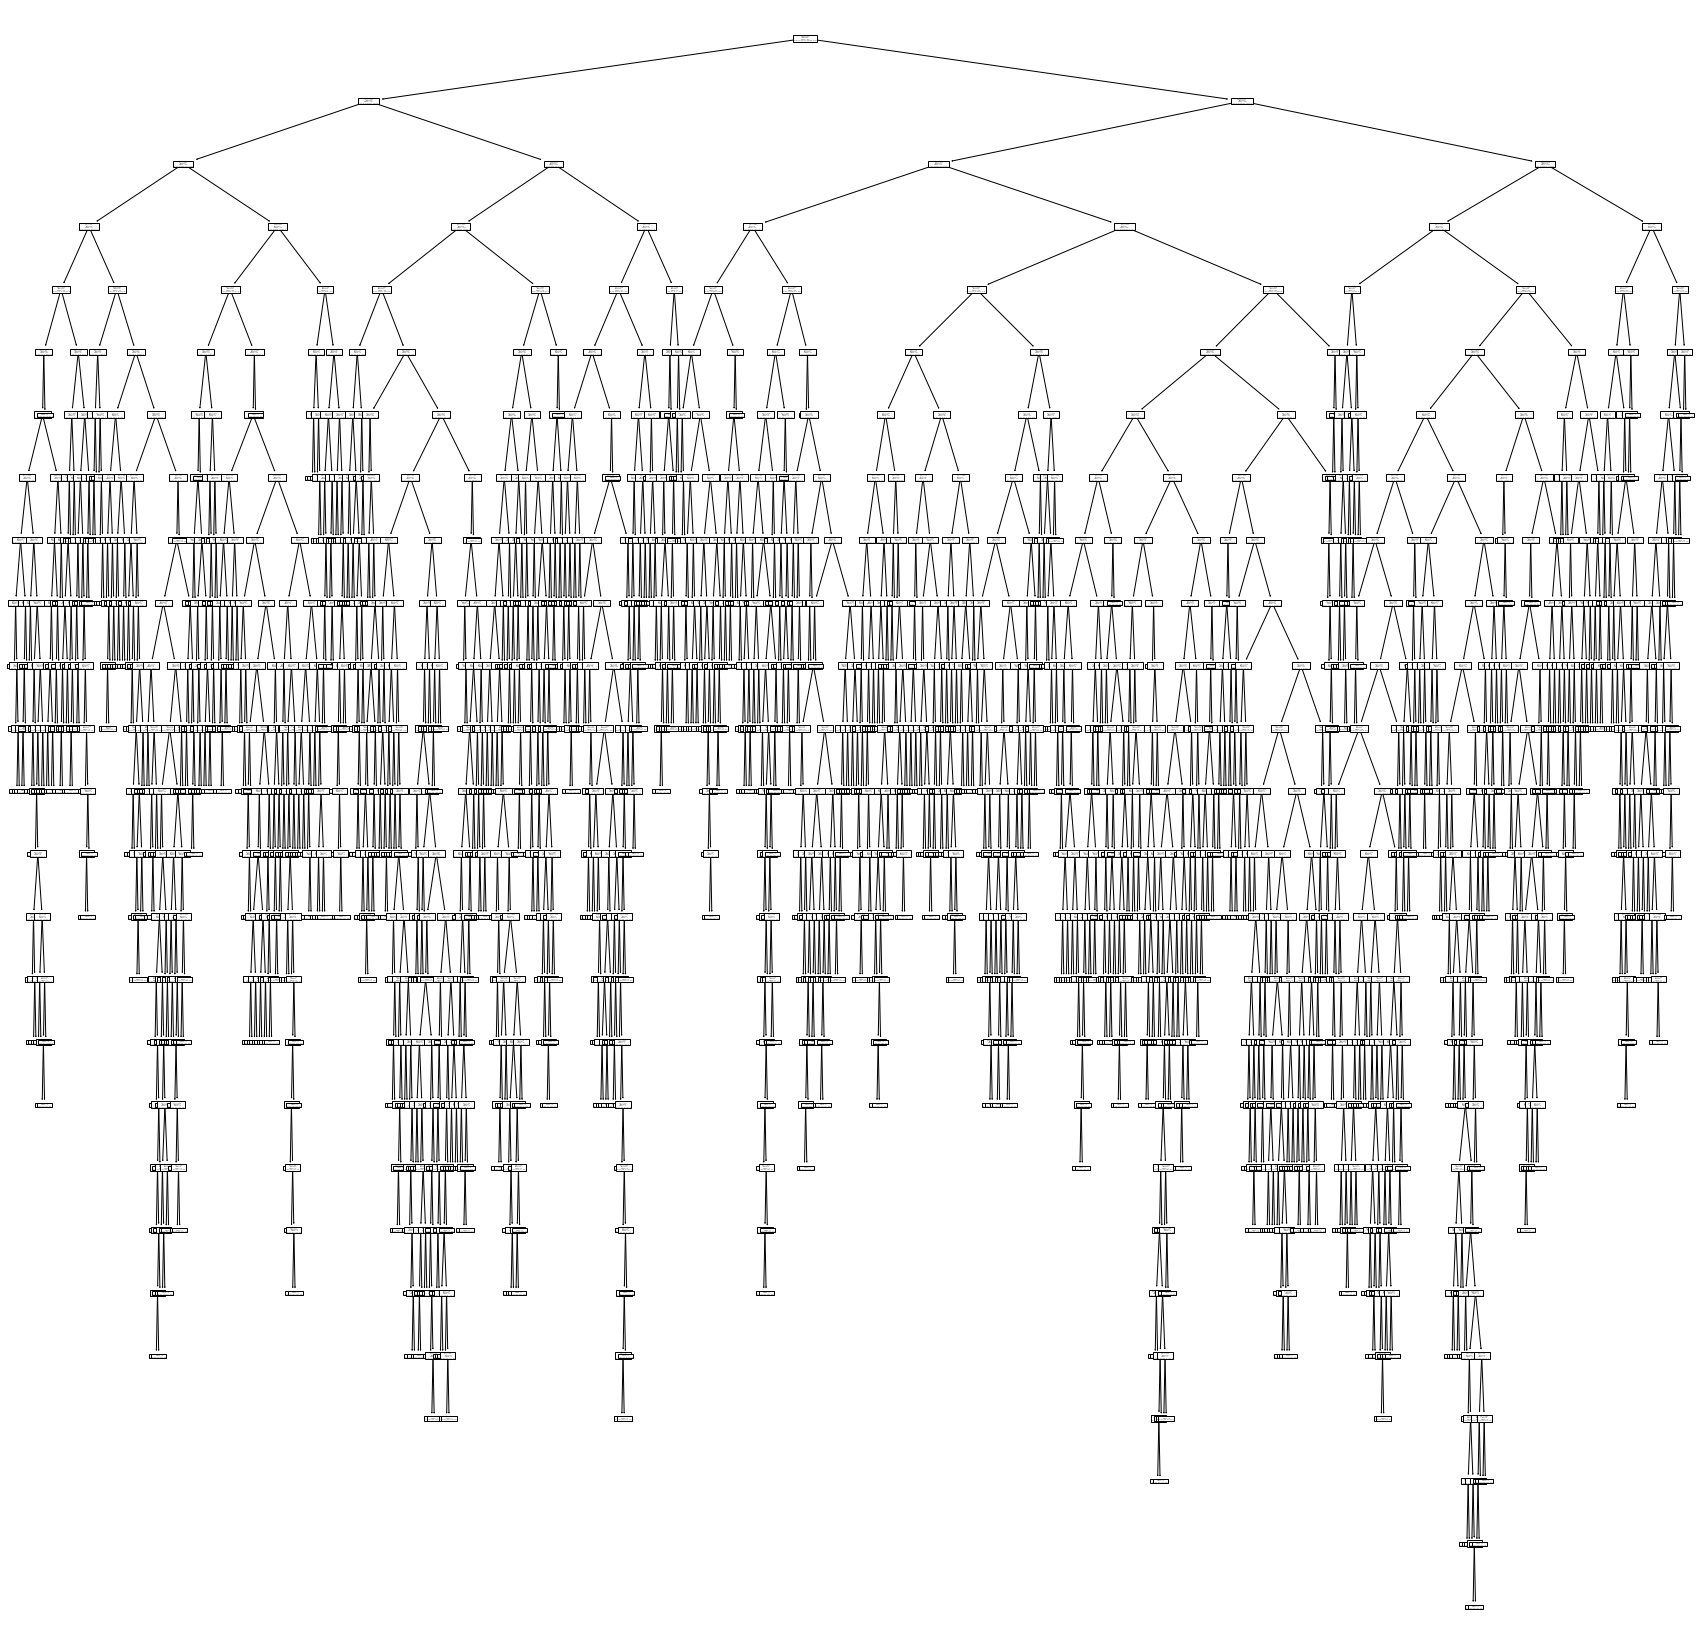

In [34]:
plt.figure(figsize=(30,30))
plot_tree(model)

In [35]:
plot_roc_curve(model, X_test, y_test)

C:\Users\cfpc2\anaconda3\envs\rv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


ValueError: Expected 'estimator' to be a binary classifier, but got DecisionTreeClassifier fit on multiclass (7 classes) data